# ReasonデバイスのIRがとりたい

Reasonの組み込みEffectのIRを計測したい  
とりあえず、計測方法を検討

# 入力用の単位インパルス列の生成

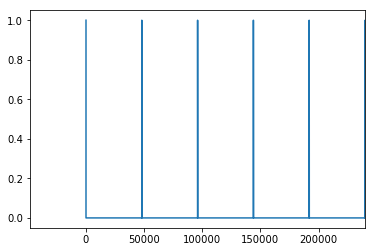

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline

#sampleRate_48 kHz, 周期_1 sec のインパルス数列10 sec分作成
t_sec = 10
fs = 48000
period = 48000
n = np.arange(0, fs * t_sec)
IT = n % period < 1
IT = IT.astype(np.float)

#グラフで確認
plt.plot(n, IT)
plt.xlim(-period, period * 5)
plt.show()

In [2]:
#wavefileに出力
sf.write("ImpulseTrain_fs48kHz_p1sec_len10sec.wav", IT, fs)

# Reason上でのインパルスファイルの読み込みと書き出し
Reasonで作成したインパルオーディオファイルを読み込む  
  
![ImpulseLoad](Fig\ImpulseLoad.png)  
  
組み込みデバイスThorを経由させる  
  
![RackBack](Fig\RackBack.png)
![RackFront](Fig\RackFront.png)  
  
waveに書き出す  
  
![BounceSetting](Fig\BounceSetting.png)
  
ディザーあり・なしの2パターンで書き出したファイルを読み込んで,  
入力インパルスと比較 (ReasonとThorを経由することで信号劣化が無いか確認)  


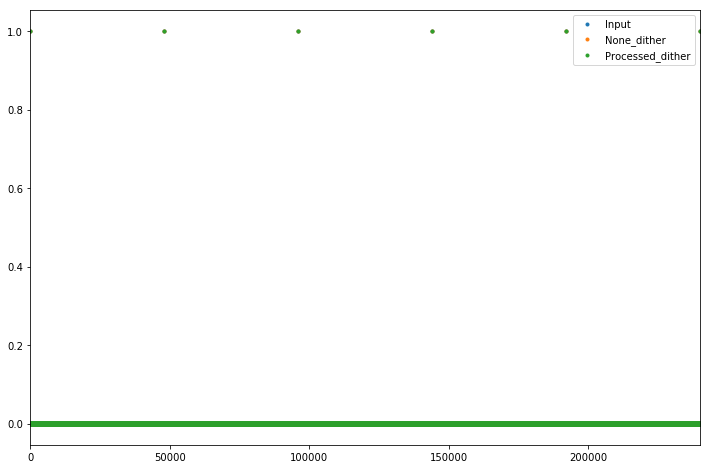

In [5]:
#wavefileの読み込み
input_sig, _ = sf.read("ImpulseTrain_fs48kHz_p1sec_len10sec.wav")
none_dither, _ = sf.read("ReasonBounce\Bypass_fs48kHz_p1sec_len10sec_16bit.wav")
processed_dither, _ = sf.read("ReasonBounce\Bypass_fs48kHz_p1sec_len10sec_16bit_dither.wav")

#Reasonからの書き出しはStereo, L Channelのみのndarrayに変換
none_dither_L = none_dither[:input_sig.size, 0]
processed_dither_L = processed_dither[:input_sig.size, 0]

#グラフに出力
plt.figure(figsize = (12, 8))
plt.scatter(np.arange(input_sig.size), input_sig, marker = ".", label = "Input")
plt.scatter(np.arange(none_dither_L.size), none_dither_L, marker = ".", label = "None_dither")
plt.scatter(np.arange(processed_dither_L.size), processed_dither_L, marker = ".", label = "Processed_dither")
plt.xlim(-100, 48000 * 5)
plt.legend()
plt.show()

Reasonに取り込んで、書き出しても特に大きく波形が崩れることはなさそう